# SUMMER ANALYTICS 2024



# Week-1 Assignment

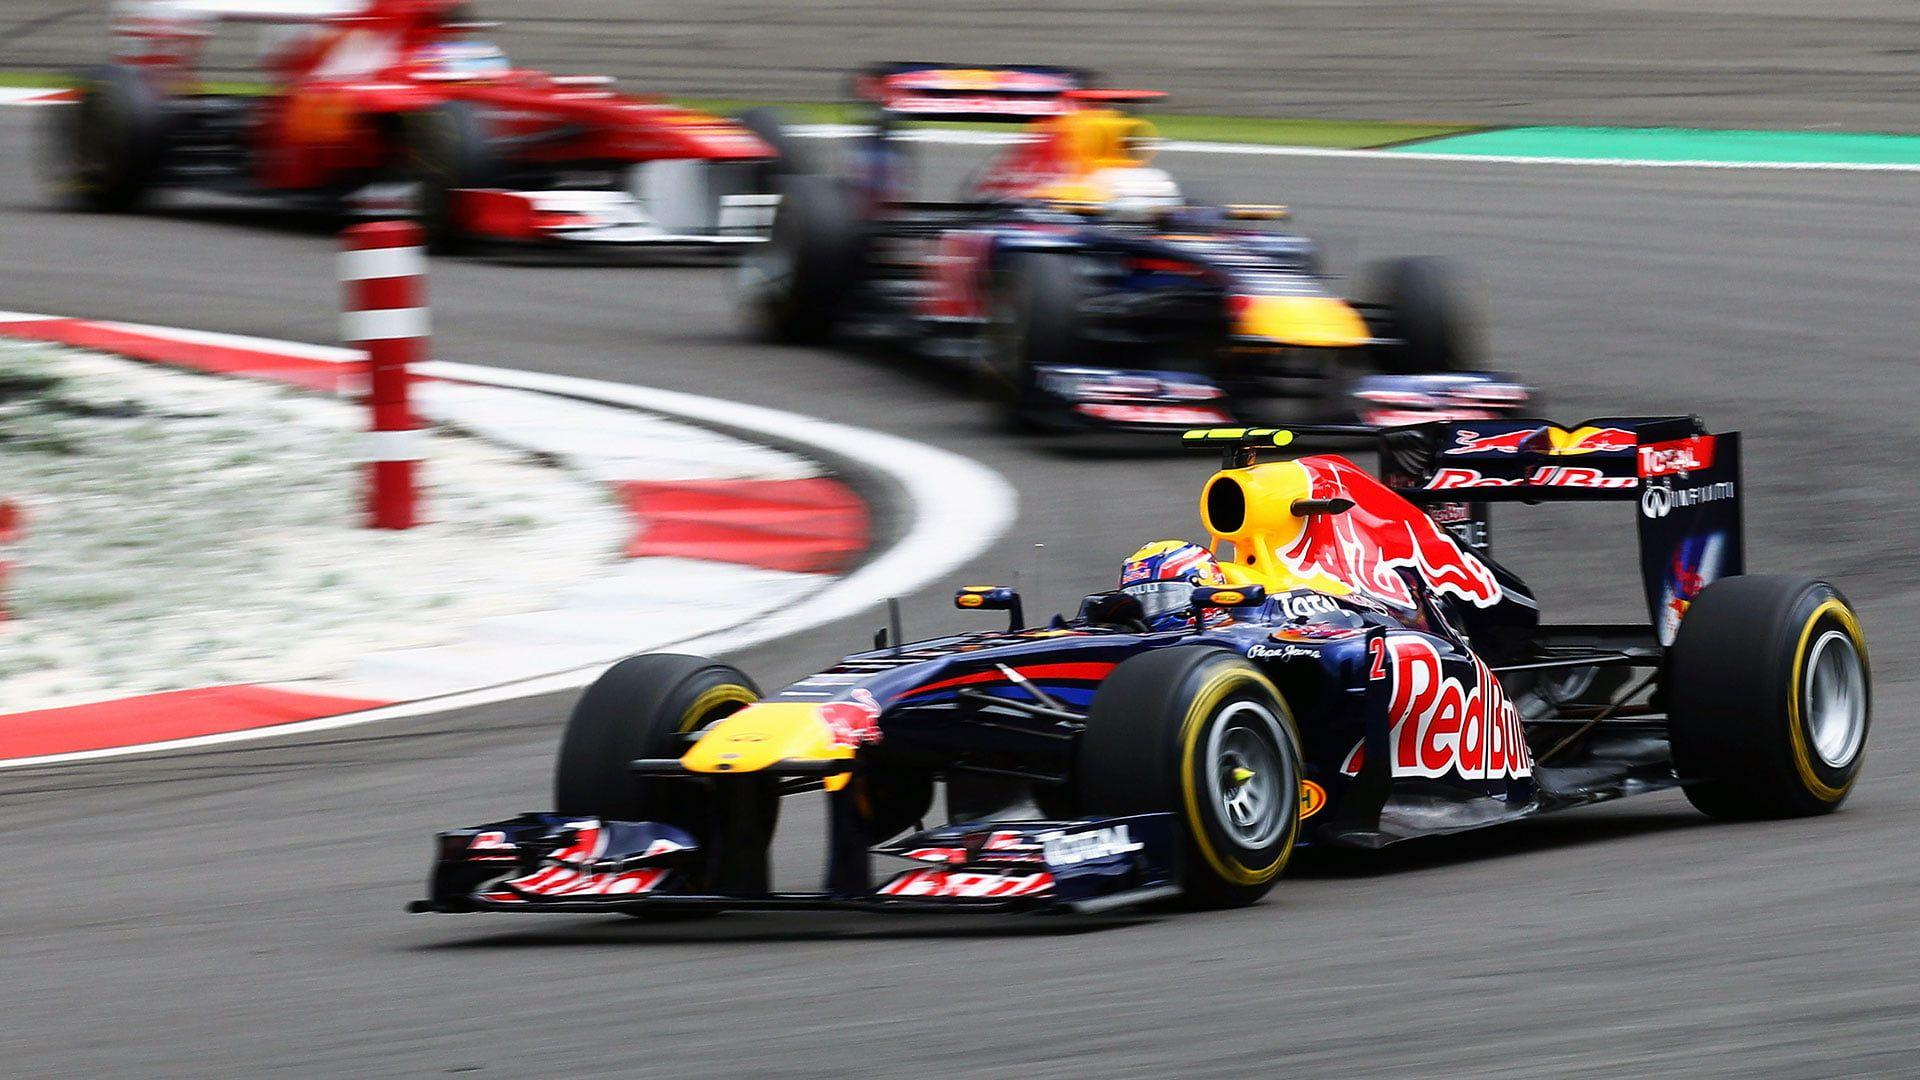

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [7]:
import pandas as pd
import numpy as np



### 2) Read the csv file and assign it to a variable .

In [12]:


df = pd.read_csv('Cars.csv')


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [13]:
print("Shape of the dataframe:", df.shape)



Shape of the dataframe: (398, 9)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [14]:
print("Columns in the dataframe:", df.columns.values)


Columns in the dataframe: ['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'name']


### 6) Set the 'name' column as the index of dataframe

In [ ]:
df.set_index('name', inplace=True)


###  7) Print a list of all the unique mpg values





In [15]:
print("Unique mpg values:", df['mpg'].unique())



Unique mpg values: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [16]:
# Create a new column with horsepower divided by weight
df['hp_per_weight'] = df['horsepower'] / df['weight']

# Set the new column as the index
df.set_index('hp_per_weight', inplace=True)


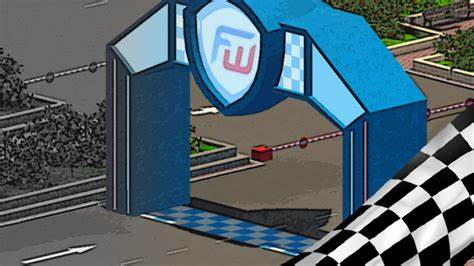

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [17]:
# Reset index if 'name' was set as index before
df_reset = df.reset_index()

# Find the car with the highest horsepower
car_max_hp = df_reset.loc[df_reset['horsepower'].idxmax()]
print("Car with highest horsepower:", car_max_hp['name'])


Car with highest horsepower: pontiac grand prix


### 2. How many cars have mpg ≥ 35?

In [18]:
high_mpg_count = (df_reset['mpg'] >= 35).sum()
print("Number of cars with mpg ≥ 35:", high_mpg_count)


Number of cars with mpg ≥ 35: 36


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [19]:
filtered = df_reset[(df_reset['horsepower'] > 100) & (df_reset['weight'] < 3000)]
common_origin = filtered['origin'].mode()[0]
print("Most common origin (hp > 100 & weight < 3000):", common_origin)


Most common origin (hp > 100 & weight < 3000): usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [20]:
mean_acc_japan = round(df_reset[df_reset['origin'] == 'japan']['acceleration'].mean(), 2)
print("Mean acceleration of cars from Japan:", mean_acc_japan)


Mean acceleration of cars from Japan: 16.17


### 5. Which year had the highest average mpg?

In [23]:
best_year = df_reset.groupby('model_year')['mpg'].mean().idxmax()
print("Year with highest average mpg:", best_year)


Year with highest average mpg: 80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [24]:
# Calculate median mpg
median_mpg = df_reset['mpg'].median()

# Filter cars with above-median mpg
above_median = df_reset[df_reset['mpg'] > median_mpg].copy()

# Calculate hp-to-weight ratio
above_median['hp_weight_ratio'] = above_median['horsepower'] / above_median['weight']

# Find car(s) with the maximum ratio
max_ratio = above_median['hp_weight_ratio'].max()
best_cars = above_median[above_median['hp_weight_ratio'] == max_ratio]

print("Car(s) with best horsepower-to-weight ratio among high mpg cars:")
print(best_cars[['name', 'horsepower', 'weight', 'hp_weight_ratio', 'mpg']])


Car(s) with best horsepower-to-weight ratio among high mpg cars:
        name  horsepower  weight  hp_weight_ratio   mpg
23  bmw 2002       113.0    2234         0.050582  26.0


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

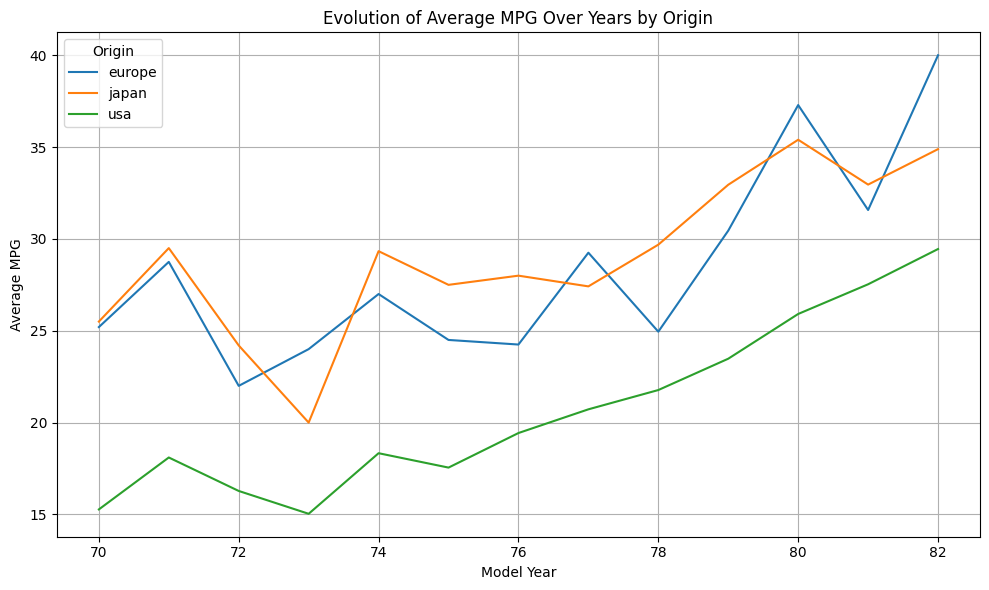

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and origin, then calculate average mpg
avg_mpg = df_reset.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg, x='model_year', y='mpg', hue='origin')
plt.title("Evolution of Average MPG Over Years by Origin")
plt.xlabel("Model Year")
plt.ylabel("Average MPG")
plt.legend(title="Origin")
plt.grid(True)
plt.tight_layout()
plt.show()


### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

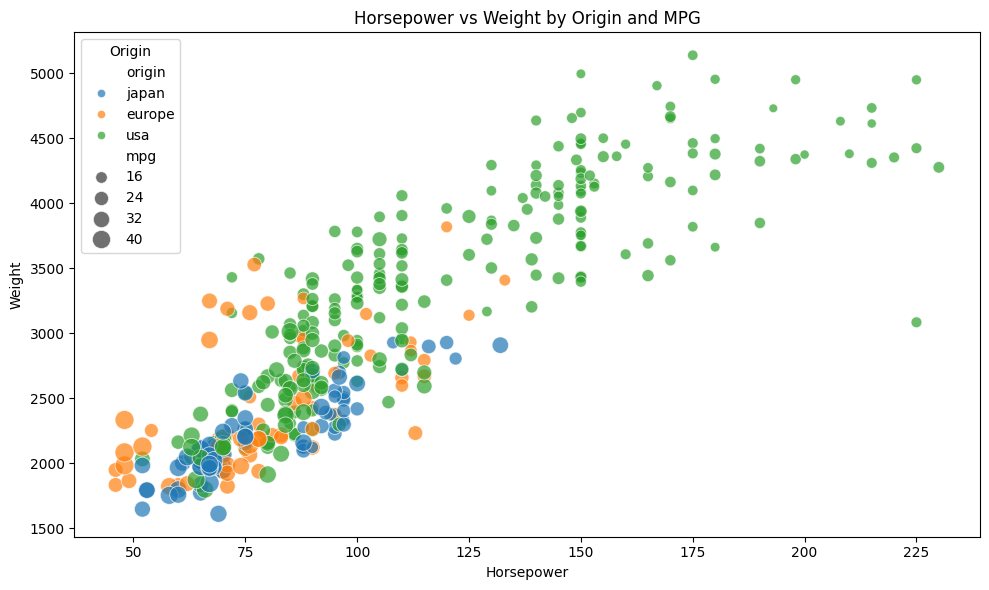

In [26]:
# Scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_reset,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa'],
    sizes=(40, 200),
    alpha=0.7
)

plt.title("Horsepower vs Weight by Origin and MPG")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.legend(title="Origin")
plt.tight_layout()
plt.show()


### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [27]:
# Group by name and count distinct model years
multi_year = df_reset.groupby('name')['model_year'].nunique()
multi_year = multi_year[multi_year > 1]

# Filter original data for only these multi-year car models
consistent_candidates = df_reset[df_reset['name'].isin(multi_year.index)]

# Group by name and compute std + count + mean mpg
consistency_stats = consistent_candidates.groupby('name').agg(
    mpg_std=('mpg', 'std'),
    appearances=('mpg', 'count'),
    avg_mpg=('mpg', 'mean')
).reset_index()

# Filter for std < 1.0
consistent_cars = consistency_stats[consistency_stats['mpg_std'] < 1.0]

# Sort by appearances (desc), then avg_mpg (desc)
consistent_cars_sorted = consistent_cars.sort_values(by=['appearances', 'avg_mpg'], ascending=False)

print("Consistent car models (std < 1.0 across multiple years):")
print(consistent_cars_sorted)


Consistent car models (std < 1.0 across multiple years):
                         name   mpg_std  appearances    avg_mpg
26           ford galaxie 500  0.577350            3  14.333333
41          plymouth fury iii  0.577350            3  14.333333
49        toyota corolla 1200  0.707107            2  31.500000
35                  mazda 626  0.212132            2  31.450000
53          volkswagen rabbit  0.353553            2  29.250000
21               datsun pl510  0.000000            2  27.000000
45                  saab 99le  0.707107            2  24.500000
51             toyota mark ii  0.707107            2  19.500000
22                dodge aspen  0.353553            2  18.850000
10  chevrolet chevelle malibu  0.707107            2  17.500000
4            amc matador (sw)  0.707107            2  14.500000
28      ford gran torino (sw)  0.707107            2  13.500000
29                   ford ltd  0.707107            2  13.500000


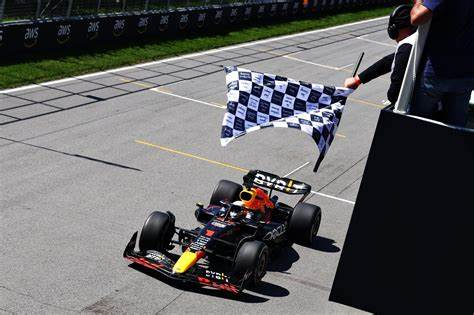

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**